In [1]:
import glob
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from natsort import natsorted, ns


In [2]:
# create function
# 2: 1cell for one comparision 
# 3. d2gi/d2go (opls4)
#   d3gi/d3go (opls4) <------------
#   d3gi/d3go (opls3e)  

# d3gi_prm (6 simulations)
# /home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f*/
# d3gi_pd (6 simulations)
# /home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f*/
# d3go_prm (6 simulations)
# /home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f*/
# d3go_pd (6 simulations)
# /home/khlee/work/desmond/output/drd3ao/pd2/drd3_pd2.f*/


# after 300ns
# (1 row is a plot)
# bro: d2gi/d2go
# prm: d3gi/d3go (opls3e)
# prm: d3gi/d3go (opls4)
# pd: d3gi/d3go (opls3e)
# pd: d3gi/d3go (opls4)



In [3]:
def read_data(receptor, ligand, time_limit=0):
    data = {"Interface":[], "System":[], "Simulation":[]}
    _filein = glob.glob("/home/khlee/work/desmond/output/"+receptor+"/"+ligand+"/*/")
    _filein = natsorted(_filein, key=lambda y: y.lower())
    for i in range(len(_filein)):
        t=np.loadtxt(_filein[i]+'/ene/time.dat')
        obs=pickle.load(open(_filein[i]+'/output/gpcr_interface.p',"rb"))
        assert (len(t)==len(obs))

        temp = pd.DataFrame({"obs":obs, "t":t})
        sel = list(temp[temp["t"]>=time_limit]["obs"])

        data["Interface"] += sel
        data["System"]+=[receptor for a in range(len(sel))]
        data["Simulation"]+=[_filein[i].split("/")[-2].split("_")[-1] for a in range(len(sel))]
    
    return pd.DataFrame(data)

In [13]:
def read_data2(receptor, ligand, time_limit=0):
    data = {"Interface":[], "System":[], "Simulation":[]}
    _filein = glob.glob("/home/khlee/work/desmond/output/"+receptor+"/"+ligand+"/*.f*/")
    _filein = natsorted(_filein, key=lambda y: y.lower())
    print(_filein)
    for i in range(len(_filein)):
        t=np.loadtxt(_filein[i]+'/ene/time.dat')
        obs=pickle.load(open(_filein[i]+'/output/gpcr_interface.p',"rb"))
        assert (len(t)==len(obs))

        temp = pd.DataFrame({"obs":obs, "t":t})
        sel = list(temp[temp["t"]>=time_limit]["obs"])

        data["Interface"] += sel
        data["System"]+=[receptor for a in range(len(sel))]
        data["Simulation"]+=[_filein[i].split("/")[-2].split("_")[-1] for a in range(len(sel))]
    
    return pd.DataFrame(data)

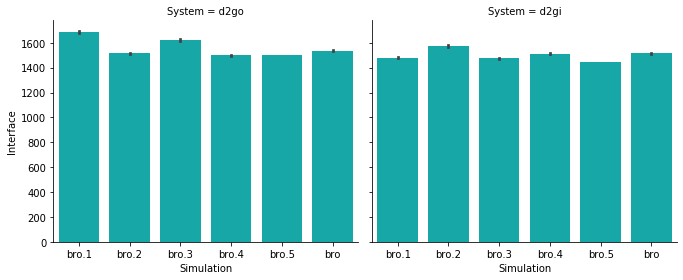

In [4]:
d2go_bro = read_data("d2go", "bro", 300)
d2gi_bro = read_data("d2gi", "bro", 300)
d2_bro = pd.concat([d2go_bro,d2gi_bro])
d2_bro_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d2_bro, kind="bar",
                height=4, aspect=1.2);

In [57]:
ls_rec=["d2gi","d2go"]
ls_jonnames=["",".1",".2",".3",".4",".5"]

for i_rec in range(len(ls_rec)):
    for i_jobname in range(len(ls_jonnames)):
        df2=d2_bro[d2_bro['Simulation']=="bro"+ls_jonnames[i_jobname]]
        _rawdata=list(df2[df2['System']==ls_rec[i_rec]]['Interface'])
        print(ls_rec[i_rec], "bro"+ls_jonnames[i_jobname], sum(_rawdata)/len(_rawdata))
        #df2[df2['System']==ls_rec[i_rec]]

d2gi bro 1516.1890091590342
d2gi bro.1 1480.225645295587
d2gi bro.2 1572.8434637801831
d2gi bro.3 1475.4687760199834
d2gi bro.4 1513.4604496253123
d2gi bro.5 1444.090757701915
d2go bro 1536.947543713572
d2go bro.1 1688.3705245628644
d2go bro.2 1514.96003996004
d2go bro.3 1621.873438800999
d2go bro.4 1498.2197802197802
d2go bro.5 1501.2639467110741


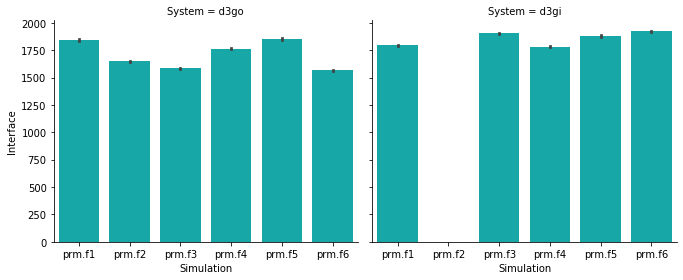

In [5]:
d3go_prm = read_data("d3go", "prm", 300)
d3gi_prm = read_data("d3gi", "prm", 300)
d3_prm = pd.concat([d3go_prm,d3gi_prm])
d3_prm_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d3_prm, kind="bar",
                height=4, aspect=1.2);

In [65]:
ls_rec=["d3gi","d3go"]
ls_jonnames=["f1","f2","f3","f4","f5","f6"]

for i_rec in range(len(ls_rec)):
    for i_jobname in range(len(ls_jonnames)):
        df2=d3_prm[d3_prm['Simulation']=="prm."+ls_jonnames[i_jobname]]
        _rawdata=list(df2[df2['System']==ls_rec[i_rec]]['Interface'])
        try:
            _ave=sum(_rawdata)/len(_rawdata)
            print(ls_rec[i_rec], ls_jonnames[i_jobname], _ave)
            #df2[df2['System']==ls_rec[i_rec]]
        except:
            print(ls_rec[i_rec], ls_jonnames[i_jobname])

d3gi f1 1794.840106595603
d3gi f2
d3gi f3 1903.1551814834297
d3gi f4 1781.9640239840107
d3gi f5 1878.6284538506761
d3gi f6 1920.7366255144034
d3go f1 1842.933897002306
d3go f2 1648.9830899308224
d3go f3 1582.4696868754163
d3go f4 1763.4594894561599
d3go f5 1851.865704772475
d3go f6 1564.742504409171


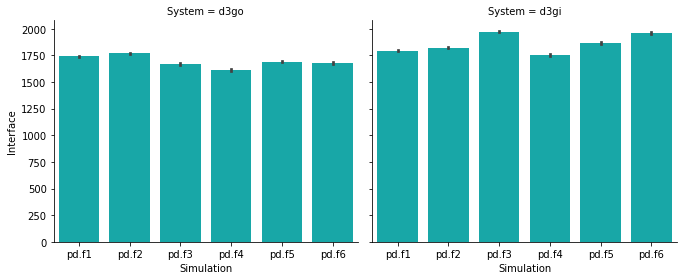

In [23]:
d3go_pd = read_data("d3go", "pd", 300)
d3gi_pd = read_data("d3gi", "pd", 300)
d3_pd = pd.concat([d3go_pd,d3gi_pd])
d3_pd_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d3_pd, kind="bar",
                height=4, aspect=1.2);

In [51]:
ls_rec=["d3gi","d3go"]
ls_jonnames=["f1","f2","f3","f4","f5","f6"]

for i_rec in range(len(ls_rec)):
    for i_jobname in range(len(ls_jonnames)):
        df2=d3_pd[d3_pd['Simulation']=="pd."+ls_jonnames[i_jobname]]
        _rawdata=list(df2[df2['System']==ls_rec[i_rec]]['Interface'])
        print(ls_rec[i_rec], ls_jonnames[i_jobname], sum(_rawdata)/len(_rawdata))
        #df2[df2['System']==ls_rec[i_rec]]

d3gi f1 1795.3774019984628
d3gi f2 1820.6936736958935
d3gi f3 1972.0688124306325
d3gi f4 1753.2441731409544
d3gi f5 1867.16621253406
d3gi f6 1957.196771714066
d3go f1 1741.9782016348775
d3go f2 1769.928247048138
d3go f3 1669.4341507720255
d3go f4 1611.765667574932
d3go f5 1691.2098092643052
d3go f6 1681.6590584878745


['/home/khlee/work/desmond/output/drd3ao/pd2/drd3ao_pd2.f1/', '/home/khlee/work/desmond/output/drd3ao/pd2/drd3ao_pd2.f2/', '/home/khlee/work/desmond/output/drd3ao/pd2/drd3ao_pd2.f3/', '/home/khlee/work/desmond/output/drd3ao/pd2/drd3ao_pd2.f4/', '/home/khlee/work/desmond/output/drd3ao/pd2/drd3ao_pd2.f5/', '/home/khlee/work/desmond/output/drd3ao/pd2/drd3ao_pd2.f6/']
['/home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f1/', '/home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f2/', '/home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f3/', '/home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f4/', '/home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f5/', '/home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f6/']


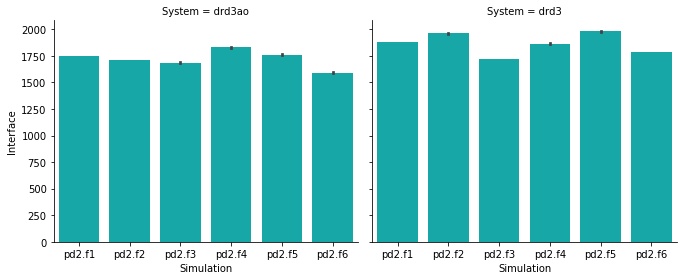

In [16]:
d3go_pd = read_data2("drd3ao", "pd2", 300)
d3gi_pd = read_data2("drd3", "pd2", 300)
d3_pd = pd.concat([d3go_pd,d3gi_pd])
d3_pd_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d3_pd, kind="bar",
                height=4, aspect=1.2);

In [52]:
ls_rec=["d3gi","d3go"]
ls_jonnames=["f1","f2","f3","f4","f5","f6"]

for i_rec in range(len(ls_rec)):
    for i_jobname in range(len(ls_jonnames)):
        df2=d3_pd[d3_pd['Simulation']=="pd."+ls_jonnames[i_jobname]]
        _rawdata=list(df2[df2['System']==ls_rec[i_rec]]['Interface'])
        print(ls_rec[i_rec], ls_jonnames[i_jobname], sum(_rawdata)/len(_rawdata))
        #df2[df2['System']==ls_rec[i_rec]]

d3gi f1 1795.3774019984628
d3gi f2 1820.6936736958935
d3gi f3 1972.0688124306325
d3gi f4 1753.2441731409544
d3gi f5 1867.16621253406
d3gi f6 1957.196771714066
d3go f1 1741.9782016348775
d3go f2 1769.928247048138
d3go f3 1669.4341507720255
d3go f4 1611.765667574932
d3go f5 1691.2098092643052
d3go f6 1681.6590584878745


['/home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f1/', '/home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f2/', '/home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f3/', '/home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f4/', '/home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f5/', '/home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f6/']
['/home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f1/', '/home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f2/', '/home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f3/', '/home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f4/', '/home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f5/', '/home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f6/']


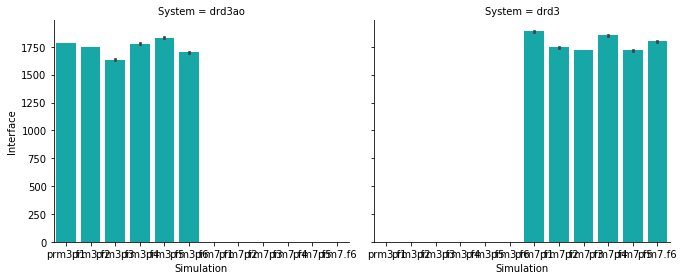

In [14]:
d3go_pd = read_data2("drd3ao", "prm3", 600)
d3gi_pd = read_data2("drd3", "prm7", 600)
d3_pd = pd.concat([d3go_pd,d3gi_pd])
d3_pd_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d3_pd, kind="bar",
                height=4, aspect=1.2);